# Data Exploration: *Alphabetical Guide to Spain*
List accompanied Thomas Matthews' Spain tasting report in *Wine Spectator* (October 15, 2020)
[Link](https://www.winespectator.com/articles/alphabetical-guide-to-spain-101520) to *Alphabetical Guide to Spain*

## File Setup

In [359]:
# import and initialize main python libraries
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

# import libraries for file navigation
import os
import shutil
import glob
from pandas_ods_reader import read_ods

# import other packages
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
from patsy import dmatrices

# import geo packages
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [360]:
# initialize vizualization set
sns.set(style="whitegrid", palette="colorblind", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

# Jupyter Notebook
%matplotlib inline

## Dataframe exploration
Import dataframes containing wine data and geographic data on Spanish wine regions.

In [361]:
# w = wine, g = geo
# Note: save CSV files in UTF-8 format to preserve special Spanish-language characters

df_w = pd.read_csv('./Alphabetical Guide to Spain - List Upload.csv')
df_g = pd.read_csv('./Alphabetical Guide to Spain - Geo.csv')

In [362]:
df_w.shape

(598, 59)

In [363]:
df_g.shape

(40, 5)

In [364]:
df_w.sample(10)

,Winery,Wine,Score,Price,Wine_Style,Denominación_de_Origen_DO,Geographical_Indication,Year,Rioja_Style,cat_Airén,...,cat_Tempranillo,cat_Tintilla_de_Rota,cat_Tinto_Velasco,cat_Treixadura,cat_Verdejo,cat_Vermell,cat_Vijiriega,cat_Viognier,cat_Viura|Macabeo,cat_Xarel-lo
460,BODEGAS REAL SITIO DE VENTOSILLA,Ribera del Duero PradoRey Finca Valdelayegua C...,92,25.0,Red,Ribera del Duero,Castilla y León,2016,Crianza,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,BODEGAS BASTIDA,Tempranillo La Mancha Alceo 2016,76,17.0,Red,La Mancha,Castile-La Mancha,2016,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,BODEGAS GORMAZ,Tempranillo Ribera del Duero 12 Linajes 2018,88,20.0,Red,Ribera del Duero,Castilla y León,2018,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,QUINTA SARDONIA,Viño de la Tierra de Castilla y León Q 2014,92,75.0,Red,Viño de la Tierra,Castilla y León,2014,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525,TUSSOCK JUMPER,Moscato Valencia Rosado 2018,83,12.0,Rosé / Rosado,Valencia,Valencian Community,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,BODEGAS RAMÍREZ,Rioja Ramírez de la Piscina Gran Reserva 2013,87,40.0,Red,Rioja,Multi-Regional,2013,Gran Reserva,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,BODEGAS GODEVAL,Godello Valdeorras 2018,92,19.0,White,Valdeorras,Galicia,2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,ISAAC FERNANDEZ SELECCIÓN,Brut Rosé Cava Biutiful NV,87,14.0,Rosé / Rosado Sparkling,Cava,Multi-Regional,NV,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Viura|Macabeo,NaN
49,BODEGAS LAS CEPAS,Maturana Tinta Rioja Rebuzno 2018,89,25.0,Red,Rioja,Multi-Regional,2018,Rioja,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
565,BODEGAS VEGALFARO,Garnacha Tintorera-Tempranillo Utiel-Requena R...,82,15.0,Red,Utiel-Requena,Valencian Community,2018,NaN,NaN,...,Tempranillo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
df_g.sample(10)

,Denominación_de_Origen_DO,Denominacion_or_GeoIndicator,Latitude,Longitude,Unnamed: 4
2,Bierzo,Denominación_de_Origen_DO,42.550000,-6.583333,https://geohack.toolforge.org/geohack.php?page...
29,Toro,Denominación_de_Origen_DO,41.525556,-5.391111,https://geohack.toolforge.org/geohack.php?page...
21,Rias Baixas,Denominación_de_Origen_DO,42.500000,-8.100000,https://geohack.toolforge.org/geohack.php?page...
10,Getariako Txakolina,Denominación_de_Origen_DO,43.301389,-2.205000,https://geohack.toolforge.org/geohack.php?page...
18,Navarra,Denominación_de_Origen_DO,42.481111,1.650556,https://geohack.toolforge.org/geohack.php?page...
38,Catalonia,Geographical_Indication,41.816667,1.466667,https://geohack.toolforge.org/geohack.php?page...
8,Cigales,Denominación_de_Origen_DO,41.766667,-4.700000,https://geohack.toolforge.org/geohack.php?page...
11,Jerez-Xérès,Denominación_de_Origen_DO,36.683944,-6.126250,https://geohack.toolforge.org/geohack.php?page...
34,Mallorca,Geographical_Indication,39.616667,2.983333,https://geohack.toolforge.org/geohack.php?page...
9,Costers del Segre,Denominación_de_Origen_DO,41.602222,0.573056,https://geohack.toolforge.org/geohack.php?page...


## Eliminate Outliers
See analysis performed in *Guide to Spain - Hypothesis Test* Jupyter notebook. Exclude two wines with extreme prices:
* Ribera del Duero Unico 2010, Score = 96, Price = 540
* Ribera del Duero Unico Reserva Especial NV, Score = 95, Price = 700

In [366]:
df_w_trim = df_w[
    (df_w.Score > 0) & 
    (df_w.Price > 0) &
    (df_w.Price < 540)
]

df_w_trim.shape

(591, 59)

## Categorical Variable for Wine
Concatenate the wine columns so that they can be visualized as a consistent categorical variable across wines.

In [367]:
# Identify those columns that start with 'cat_' identifier. 
# Create a new column that concatenates those columnes where value is not 'None'.

df_w_trim = df_w_trim.reindex(columns = df_w_trim.columns.tolist() + ['Grapes_Mentioned', 'Grape_Count'])

for index in df_w_trim.index:
    grape_series = df_w_trim.loc[index, 'cat_Airén':'cat_Xarel-lo'].dropna()
    grape_string = grape_series.str.cat(sep = ' - ')
    grape_count = grape_series.count()
    df_w_trim['Grapes_Mentioned'][index] = grape_string
    df_w_trim['Grape_Count'][index] = grape_count

/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/elizabethwotawa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-cop

In [368]:
df_w_trim.sample(10)

,Winery,Wine,Score,Price,Wine_Style,Denominación_de_Origen_DO,Geographical_Indication,Year,Rioja_Style,cat_Airén,...,cat_Tinto_Velasco,cat_Treixadura,cat_Verdejo,cat_Vermell,cat_Vijiriega,cat_Viognier,cat_Viura|Macabeo,cat_Xarel-lo,Grapes_Mentioned,Grape_Count
240,BODEGAS LAN,Rioja Crianza 2017,88,15.0,Red,Rioja,Multi-Regional,2017,Crianza,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tempranillo,1.0
471,UNIÓN DE VITICULTORES RIOJANOS,Rioja Viña Otano Rosado 2018,84,13.0,Rosé / Rosado,Rioja,Multi-Regional,2018,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Garnacha|Garnatxa|Grenache,1.0
41,BODEGAS BERONIA,Rioja III a.C. 2015,91,76.0,Red,Rioja,Multi-Regional,2015,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tempranillo,1.0
476,BODEGAS SANTA EULALIA,Ribera del Duero Conde de Siruela Élite 2016,92,50.0,Red,Ribera del Duero,Castilla y León,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tempranillo,1.0
299,BODEGAS MANZANOS,Rioja Sokatira Crianza 2016,90,20.0,Red,Rioja,Multi-Regional,2016,Crianza,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Garnacha|Garnatxa|Grenache - Tempranillo,2.0
131,CONTINO,Rioja Viña del Olivo 2017,89,145.0,Red,Rioja,Multi-Regional,2017,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graciano - Tempranillo,2.0
501,SIERRA NORTE,Bobal Utiel-Requena Temperamento 2017,85,15.0,Red,Utiel-Requena,Valencian Community,2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bobal,1.0
149,CUNE,Rioja White Monopole Clásico 2016,91,27.0,White,Rioja,Multi-Regional,2016,Rioja,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Viura|Macabeo,NaN,Viura|Macabeo,1.0
282,BODEGAS Y VIÑEDOS LUNA BEBERIDE,Bierzo Paixar Dragonte 2016,87,80.0,Red,Bierzo,Castilla y León,2016,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mencía,1.0
202,BODEGAS FRUTOS VILLAR,Toro Muruve Crianza 2015,89,19.0,Red,Toro,Castilla y León,2015,Crianza,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tempranillo,1.0


## Develop dataframes for geographic viewing
Build dataframes that organize geographic data for viewing on map.

In [369]:
# Count of scores by region
df_geo_count = df_w_trim[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_count_join = pd.merge(df_geo_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_count_join = df_geo_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Rioja,209,42.461750,-2.445694
1,Ribera del Duero,88,41.683333,-3.683333
2,Jumilla,29,38.783333,-1.316667
3,Rias Baixas,25,42.500000,-8.100000
4,Rueda,20,41.414130,-4.957104
5,Priorat,19,41.133333,0.816667
6,Montsant,17,41.146944,0.821389
7,Campo de Borja,16,41.816667,-1.533333
8,Navarra,14,42.481111,1.650556
9,Bierzo,14,42.550000,-6.583333


In [370]:
# Average score by region
df_geo_mean_score = df_w_trim[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').mean().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_mean_score_join = pd.merge(df_geo_mean_score, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_mean_score_join = df_geo_mean_score_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_mean_score_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Priorat,90.736842,41.133333,0.816667
1,Toro,90.666667,41.525556,-5.391111
2,Valdeorras,90.500000,42.388889,-7.047222
3,Jerez-Xérès,90.500000,36.683944,-6.126250
4,Alicante,90.333333,38.736944,-0.274656
5,Méntrida,90.000000,40.050000,-4.200000
6,Bizkaiko Txakolina,90.000000,43.325556,-2.988889
7,Ribeiro,89.714286,42.283333,-8.133333
8,Bierzo,89.714286,42.550000,-6.583333
9,Ribera del Duero,89.465909,41.683333,-3.683333


In [371]:
# Average price by region
df_geo_mean_price = df_w_trim[['Denominación_de_Origen_DO', 'Price']].groupby('Denominación_de_Origen_DO').mean().sort_values(by='Price', ascending=False)

# Join coordinates from second dataframe
df_geo_mean_price_join = pd.merge(df_geo_mean_price, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_mean_price_join = df_geo_mean_price_join[['Denominación_de_Origen_DO', 'Price', 'Latitude', 'Longitude']]

df_geo_mean_price_join

,Denominación_de_Origen_DO,Price,Latitude,Longitude
0,Priorat,61.315789,41.133333,0.816667
1,Cigales,56.333333,41.766667,-4.700000
2,Bierzo,46.142857,42.550000,-6.583333
3,Ribera del Duero,43.977273,41.683333,-3.683333
4,Toro,39.083333,41.525556,-5.391111
5,Alella,37.000000,41.495278,2.295833
6,Rioja,32.607656,42.461750,-2.445694
7,Penedès,31.857143,41.293283,1.749572
8,Jumilla,26.172414,38.783333,-1.316667
9,Bizkaiko Txakolina,25.000000,43.325556,-2.988889


In [372]:
# Count of red wines by region

# subset df_w_trim for red wines only
df_w_red = df_w_trim[(df_w_trim.Wine_Style == 'Red')]

df_geo_red_count = df_w_red[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_red_count_join = pd.merge(df_geo_red_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_red_count_join = df_geo_red_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_red_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Rioja,164,42.461750,-2.445694
1,Ribera del Duero,88,41.683333,-3.683333
2,Jumilla,27,38.783333,-1.316667
3,Priorat,17,41.133333,0.816667
4,Montsant,15,41.146944,0.821389
5,Toro,12,41.525556,-5.391111
6,Campo de Borja,10,41.816667,-1.533333
7,Bierzo,9,42.550000,-6.583333
8,Calatayud,7,41.650000,-0.883333
9,Navarra,5,42.481111,1.650556


In [373]:
# Count of Rosé / Rosado wines by region

# subset df_w_trim for red wines only
df_w_rose = df_w_trim[(df_w_trim.Wine_Style == 'Rosé / Rosado')]

df_geo_rose_count = df_w_rose[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_rose_count_join = pd.merge(df_geo_rose_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_rose_count_join = df_geo_rose_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_rose_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Rioja,18,42.461750,-2.445694
1,Navarra,5,42.481111,1.650556
2,Campo de Borja,3,41.816667,-1.533333
3,Getariako Txakolina,3,43.301389,-2.205000
4,Priorat,2,41.133333,0.816667
5,Utiel-Requena,2,39.506158,-1.181028
6,Valencia,2,39.466667,-0.375000
7,Bierzo,1,42.550000,-6.583333
8,Cava,1,41.816667,1.466667
9,Jumilla,1,38.783333,-1.316667


In [374]:
# Count of Rosé / Rosado Sparkling  wines by region

# subset df_w_trim for Rosé / Rosado Sparkling wines only
df_w_rosesparkling = df_w_trim[(df_w_trim.Wine_Style == 'Rosé / Rosado Sparkling')]

df_geo_rosesparkling_count = df_w_rosesparkling[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_rosesparkling_count_join = pd.merge(df_geo_rosesparkling_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_rosesparkling_count_join = df_geo_rosesparkling_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_rosesparkling_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude


In [375]:
# Count of Sherry wines by region

# subset df_w_trim for sherry wines only
df_w_sherry = df_w_trim[(df_w_trim.Wine_Style == 'Sherry')]

df_geo_sherry_count = df_w_sherry[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_sherry_count_join = pd.merge(df_geo_sherry_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_sherry_count_join = df_geo_sherry_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_sherry_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Jerez-Xérès,8,36.683944,-6.126250
1,Manzanilla,3,36.773611,-6.356944
2,Montilla-Moriles,2,37.585444,-4.639500


In [376]:
# Count of sparkling wines by region

# subset df_w_trim for sparkling wines only
df_w_sparkling = df_w_trim[(df_w_trim.Wine_Style == 'Sparkling')]

df_geo_sparkling_count = df_w_sparkling[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_sparkling_count_join = pd.merge(df_geo_sparkling_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_sparkling_count_join = df_geo_sparkling_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_sparkling_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Cava,11,41.816667,1.466667
1,Penedès,1,41.293283,1.749572


In [377]:
# Count of white wines by region

# subset df_w_trim for sparkling wines only
df_w_white = df_w_trim[(df_w_trim.Wine_Style == 'White')]

df_geo_white_count = df_w_white[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_white_count_join = pd.merge(df_geo_white_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_white_count_join = df_geo_white_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_white_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Rioja,27,42.461750,-2.445694
1,Rias Baixas,25,42.500000,-8.100000
2,Rueda,20,41.414130,-4.957104
3,Getariako Txakolina,5,43.301389,-2.205000
4,Ribeiro,5,42.283333,-8.133333
5,Navarra,4,42.481111,1.650556
6,Bierzo,4,42.550000,-6.583333
7,Penedès,3,41.293283,1.749572
8,Valdeorras,3,42.388889,-7.047222
9,Campo de Borja,3,41.816667,-1.533333


In [378]:
# Single vintage wines

# subset of df_w_trim for single-grape wines
df_w_onegrape = df_w_trim[(df_w_trim.Grape_Count == 1)]

df_w_onegrape[['Grapes_Mentioned', 'Score']].groupby('Grapes_Mentioned').count().sort_values(by='Score', ascending=False)


,Score
Grapes_Mentioned,
Tempranillo,214
Garnacha|Garnatxa|Grenache,50
Albariño,24
Verdejo,19
Monastrell|Mourvedre|Mataro,16
Mencía,13
Viura|Macabeo,12
Palomino,11
Godello,10


In [379]:
# Count of tempranillo by region

# subset df_w_onegrape for tempranillo only
df_w_tempranillo = df_w_onegrape[(df_w_onegrape.Grapes_Mentioned == 'Tempranillo')]

df_geo_tempranillo_count = df_w_tempranillo[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_tempranillo_count_join = pd.merge(df_geo_tempranillo_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_tempranillo_count_join = df_geo_tempranillo_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_tempranillo_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Rioja,105,42.461750,-2.445694
1,Ribera del Duero,81,41.683333,-3.683333
2,Toro,12,41.525556,-5.391111
3,Cigales,3,41.766667,-4.700000
4,La Mancha,2,39.405556,-3.205556
5,Jumilla,1,38.783333,-1.316667
6,Navarra,1,42.481111,1.650556


In [380]:
# Count of garnacha by region

# subset df_w_onegrape for garnacha only
df_w_garnacha = df_w_onegrape[(df_w_onegrape.Grapes_Mentioned == 'Garnacha|Garnatxa|Grenache')]

df_geo_garnacha_count = df_w_garnacha[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_garnacha_count_join = pd.merge(df_geo_garnacha_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_garnacha_count_join = df_geo_garnacha_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_garnacha_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Campo de Borja,11,41.816667,-1.533333
1,Calatayud,7,41.650000,-0.883333
2,Rioja,7,42.461750,-2.445694
3,Montsant,5,41.146944,0.821389
4,Navarra,4,42.481111,1.650556
5,Priorat,3,41.133333,0.816667
6,Penedès,2,41.293283,1.749572
7,Somontano,2,42.036111,0.126389
8,Terra Alta,2,41.050000,0.433333
9,Valencia,2,39.466667,-0.375000


In [381]:
# Count of Albariño by region

# subset df_w_onegrape for Albariño only
df_w_albarino = df_w_onegrape[(df_w_onegrape.Grapes_Mentioned == 'Albariño')]

df_geo_albarino_count = df_w_albarino[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_albarino_count_join = pd.merge(df_geo_albarino_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_albarino_count_join = df_geo_albarino_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_albarino_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Rias Baixas,24,42.5,-8.1


In [382]:
# Count of Verdejo by region

# subset df_w_onegrape for Verdejo only
df_w_verdejo = df_w_onegrape[(df_w_onegrape.Grapes_Mentioned == 'Verdejo')]

df_geo_verdejo_count = df_w_verdejo[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_verdejo_count_join = pd.merge(df_geo_verdejo_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_verdejo_count_join = df_geo_verdejo_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_verdejo_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Rueda,18,41.414130,-4.957104
1,La Mancha,1,39.405556,-3.205556


In [383]:
# Count of Monastrell|Mourvedre|Mataro by region

# subset df_w_onegrape for Verdejo only
df_w_monastrell = df_w_onegrape[(df_w_onegrape.Grapes_Mentioned == 'Monastrell|Mourvedre|Mataro')]

df_geo_monastrell_count = df_w_monastrell[['Denominación_de_Origen_DO', 'Score']].groupby('Denominación_de_Origen_DO').count().sort_values(by='Score', ascending=False)

# Join coordinates from second dataframe
df_geo_monastrell_count_join = pd.merge(df_geo_monastrell_count, df_g, on = 'Denominación_de_Origen_DO', how = 'inner')

df_geo_monastrell_count_join = df_geo_monastrell_count_join[['Denominación_de_Origen_DO', 'Score', 'Latitude', 'Longitude']]

df_geo_monastrell_count_join

,Denominación_de_Origen_DO,Score,Latitude,Longitude
0,Jumilla,13,38.783333,-1.316667
1,Alicante,2,38.736944,-0.274656
2,Yecla,1,38.616700,-1.116700


## Map Results
Plot the geographic results on a shapefile map of Spain.

### Import Shapefile
See [First-level Administrative Divisions, Spain, 2015](https://geo.nyu.edu/catalog/stanford-kk544xm4197) from the NYU Spatial Data Repository.  
See [GeoPandas 101: Plot any data with a latitude and a longitude on a map](https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972).

In [384]:
spain_map = gpd.read_file('./stanford-kk544xm4197-shapefile/kk544xm4197.shp')

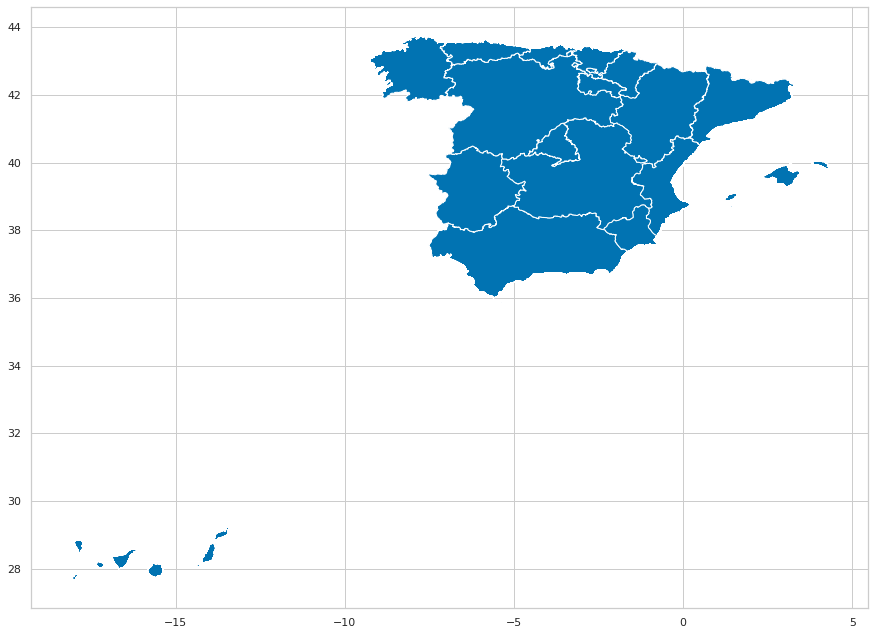

In [385]:
fig, ax = plt.subplots(figsize = (15, 15))
spain_map.plot(ax = ax)

In [386]:
# Define a coordinate reference system (CRS)
crs = {'init': 'espg:4326'}

### Plot Counts by Denominación de Origen

In [387]:
geo_count = [Point(xy) for xy in zip( df_geo_count_join['Longitude'], df_geo_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Rioja,209,42.461750,-2.445694,POINT (-2.44569 42.46175)
1,Ribera del Duero,88,41.683333,-3.683333,POINT (-3.68333 41.68333)
2,Jumilla,29,38.783333,-1.316667,POINT (-1.31667 38.78333)
3,Rias Baixas,25,42.500000,-8.100000,POINT (-8.10000 42.50000)
4,Rueda,20,41.414130,-4.957104,POINT (-4.95710 41.41413)


Text(0.5, 1, 'Count of Wine Spectator Scores by Denominación de Origen')

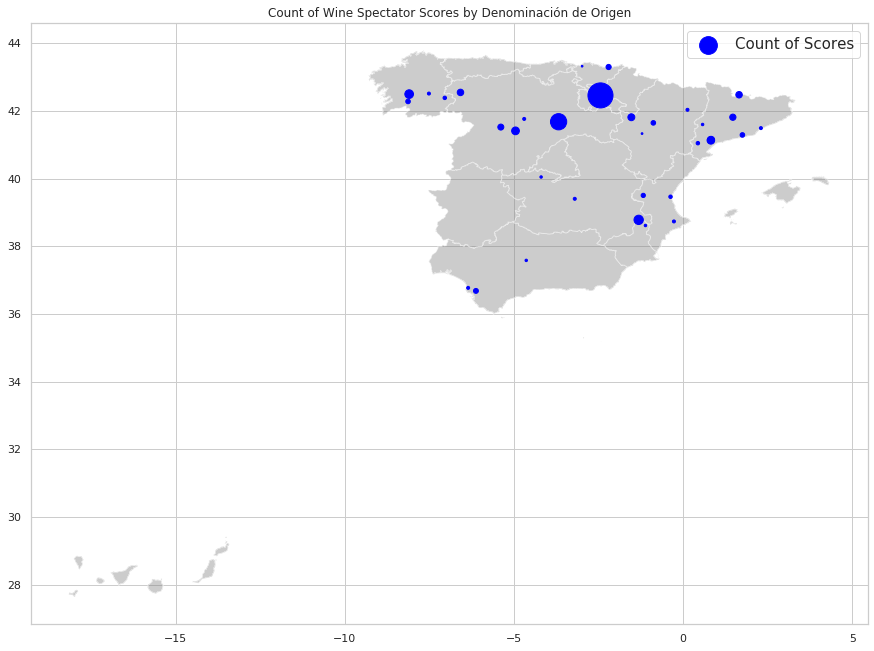

In [388]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'blue', marker = 'o', label = 'Count of Scores')
plt.legend(prop={'size': 15})
plt.title('Count of Wine Spectator Scores by Denominación de Origen')

### Plot mean *Wine Spectator Score* by Denominación de Origen

In [389]:
geo_count = [Point(xy) for xy in zip( df_geo_mean_score_join['Longitude'], df_geo_mean_score_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_mean_score_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Priorat,90.736842,41.133333,0.816667,POINT (0.81667 41.13333)
1,Toro,90.666667,41.525556,-5.391111,POINT (-5.39111 41.52556)
2,Valdeorras,90.500000,42.388889,-7.047222,POINT (-7.04722 42.38889)
3,Jerez-Xérès,90.500000,36.683944,-6.126250,POINT (-6.12625 36.68394)
4,Alicante,90.333333,38.736944,-0.274656,POINT (-0.27466 38.73694)


Text(0.5, 1, 'Mean Wine Spectator Score by Denominación de Origen')

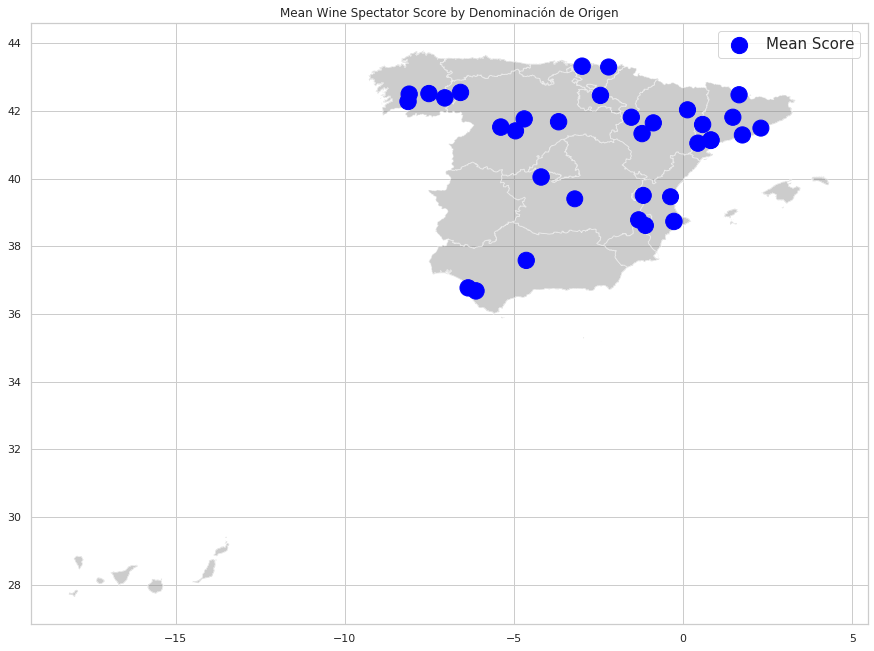

In [390]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'blue', marker = 'o', label = 'Mean Score')
plt.legend(prop={'size': 15})
plt.title('Mean Wine Spectator Score by Denominación de Origen')

### Plot mean Wine Price by Denominación de Origen

In [391]:
geo_count = [Point(xy) for xy in zip( df_geo_mean_price_join['Longitude'], df_geo_mean_price_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_mean_price_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Price,Latitude,Longitude,geometry
0,Priorat,61.315789,41.133333,0.816667,POINT (0.81667 41.13333)
1,Cigales,56.333333,41.766667,-4.700000,POINT (-4.70000 41.76667)
2,Bierzo,46.142857,42.550000,-6.583333,POINT (-6.58333 42.55000)
3,Ribera del Duero,43.977273,41.683333,-3.683333,POINT (-3.68333 41.68333)
4,Toro,39.083333,41.525556,-5.391111,POINT (-5.39111 41.52556)


Text(0.5, 1, 'Mean Wine Price by Denominación de Origen')

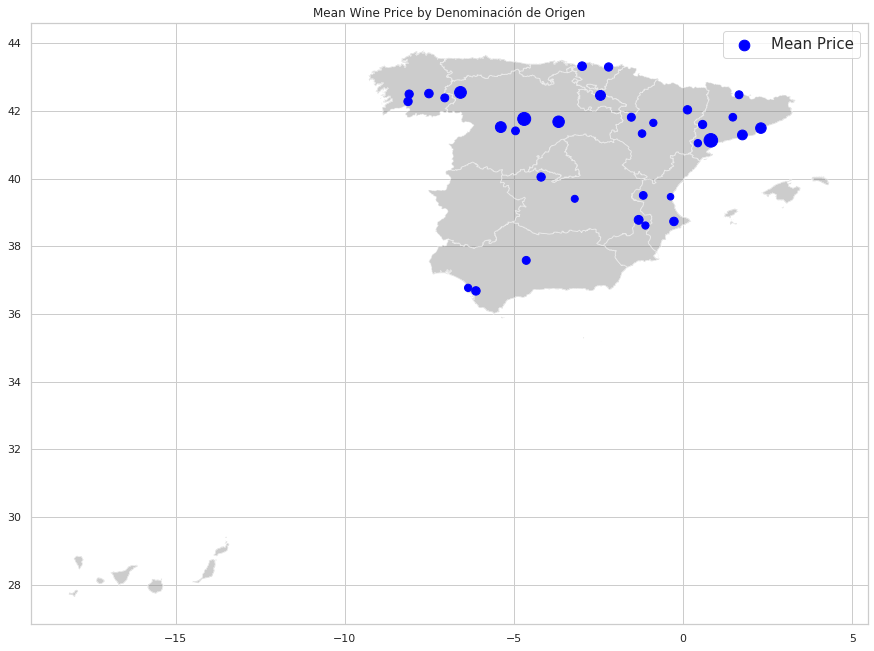

In [392]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Price'] * 3, color = 'blue', marker = 'o', label = 'Mean Price')
plt.legend(prop={'size': 15})
plt.title('Mean Wine Price by Denominación de Origen')

### Red Wines: Plot count of *Wine Spectator* Scores by Denominación de Origen

In [393]:
geo_count = [Point(xy) for xy in zip( df_geo_red_count_join['Longitude'], df_geo_red_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_red_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Rioja,164,42.461750,-2.445694,POINT (-2.44569 42.46175)
1,Ribera del Duero,88,41.683333,-3.683333,POINT (-3.68333 41.68333)
2,Jumilla,27,38.783333,-1.316667,POINT (-1.31667 38.78333)
3,Priorat,17,41.133333,0.816667,POINT (0.81667 41.13333)
4,Montsant,15,41.146944,0.821389,POINT (0.82139 41.14694)


Text(0.5, 1, 'Red Wines:\nCount of Wine Spectator Scores by Denominación de Origen')

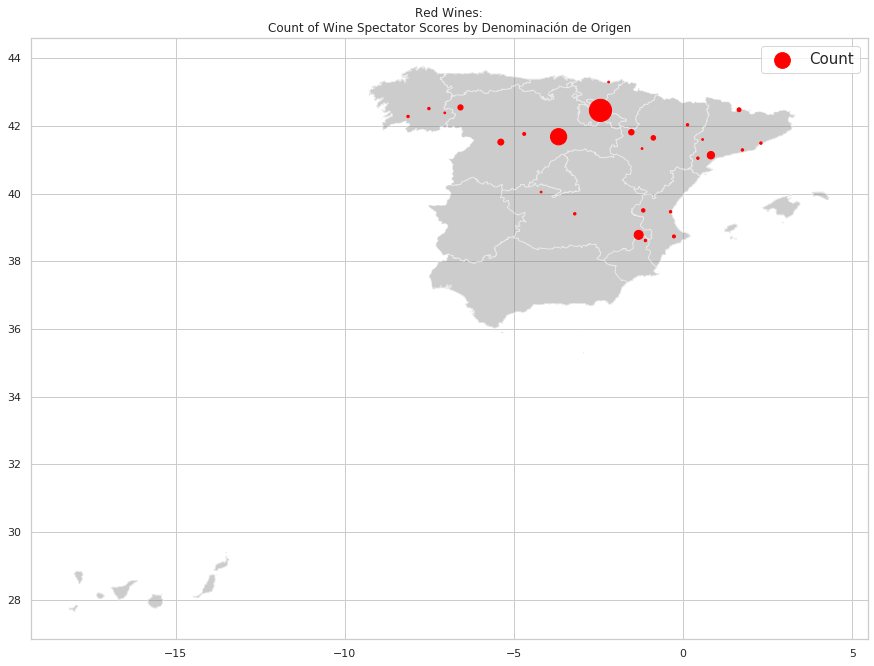

In [394]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'red', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Red Wines:\nCount of Wine Spectator Scores by Denominación de Origen')

### Rosé Wines: Plot count of *Wine Spectator* Scores by Denominación de Origen

In [395]:
geo_count = [Point(xy) for xy in zip( df_geo_rose_count_join['Longitude'], df_geo_rose_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_rose_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Rioja,18,42.461750,-2.445694,POINT (-2.44569 42.46175)
1,Navarra,5,42.481111,1.650556,POINT (1.65056 42.48111)
2,Campo de Borja,3,41.816667,-1.533333,POINT (-1.53333 41.81667)
3,Getariako Txakolina,3,43.301389,-2.205000,POINT (-2.20500 43.30139)
4,Priorat,2,41.133333,0.816667,POINT (0.81667 41.13333)


Text(0.5, 1, 'Rosé (Rosado) Wines:\nCount of Wine Spectator Scores by Denominación de Origen')

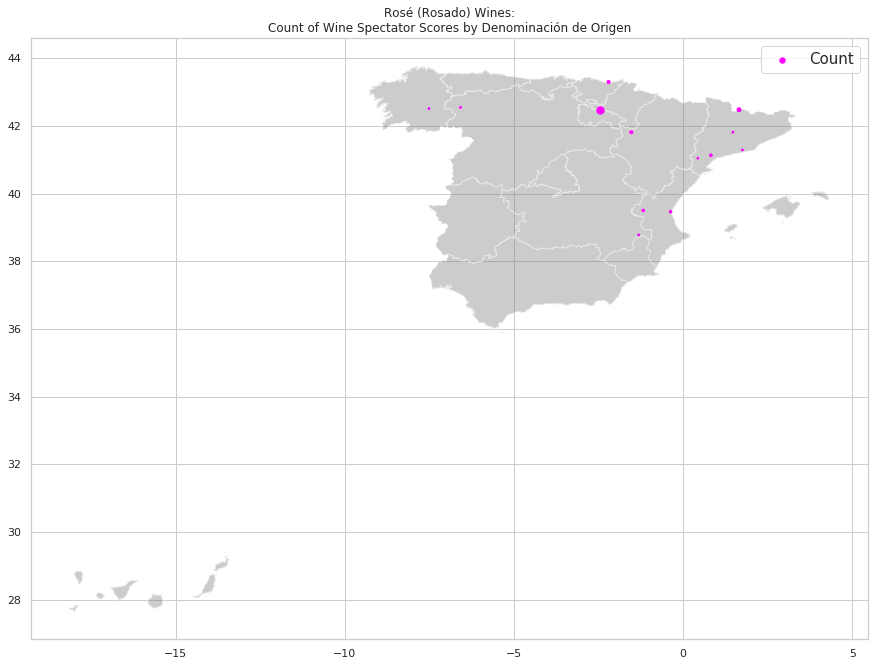

In [396]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'magenta', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Rosé (Rosado) Wines:\nCount of Wine Spectator Scores by Denominación de Origen')

### Sherry Wines: Plot count of *Wine Spectator* Scores by Denominación de Origen

In [397]:
geo_count = [Point(xy) for xy in zip( df_geo_sherry_count_join['Longitude'], df_geo_sherry_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_sherry_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Jerez-Xérès,8,36.683944,-6.126250,POINT (-6.12625 36.68394)
1,Manzanilla,3,36.773611,-6.356944,POINT (-6.35694 36.77361)
2,Montilla-Moriles,2,37.585444,-4.639500,POINT (-4.63950 37.58544)


Text(0.5, 1, 'Sherry:\nCount of Wine Spectator Scores by Denominación de Origen')

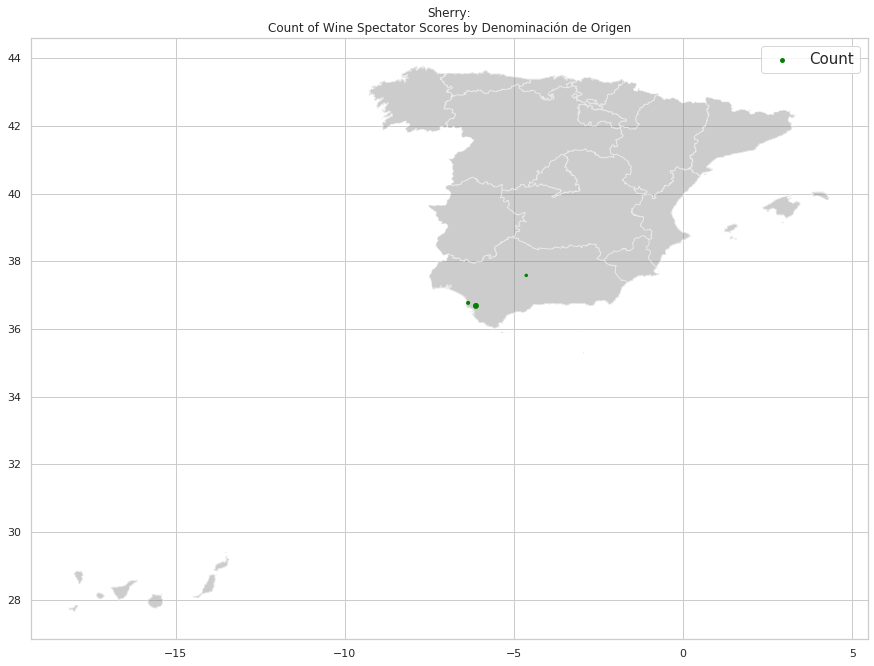

In [398]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'green', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Sherry:\nCount of Wine Spectator Scores by Denominación de Origen')

### Sparkling Wines: Plot count of *Wine Spectator* Scores by Denominación de Origen

In [399]:
geo_count = [Point(xy) for xy in zip( df_geo_sparkling_count_join['Longitude'], df_geo_sparkling_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_sparkling_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Cava,11,41.816667,1.466667,POINT (1.46667 41.81667)
1,Penedès,1,41.293283,1.749572,POINT (1.74957 41.29328)


Text(0.5, 1, 'Sparkling Wine:\nCount of Wine Spectator Scores by Denominación de Origen')

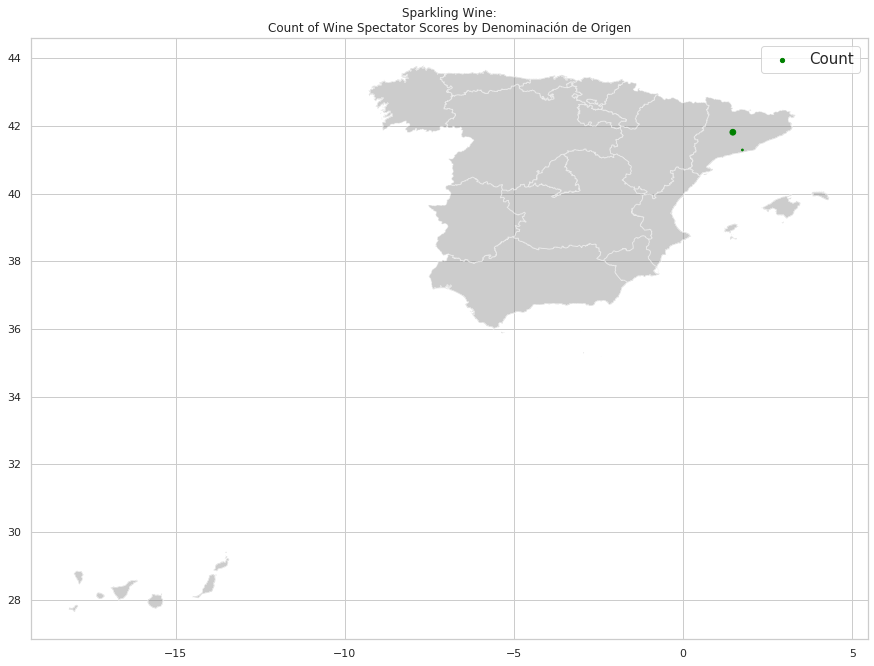

In [400]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'green', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Sparkling Wine:\nCount of Wine Spectator Scores by Denominación de Origen')

### White Wines: Plot count of *Wine Spectator* Scores by Denominación de Origen

In [401]:
geo_count = [Point(xy) for xy in zip( df_geo_white_count_join['Longitude'], df_geo_white_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_white_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Rioja,27,42.461750,-2.445694,POINT (-2.44569 42.46175)
1,Rias Baixas,25,42.500000,-8.100000,POINT (-8.10000 42.50000)
2,Rueda,20,41.414130,-4.957104,POINT (-4.95710 41.41413)
3,Getariako Txakolina,5,43.301389,-2.205000,POINT (-2.20500 43.30139)
4,Ribeiro,5,42.283333,-8.133333,POINT (-8.13333 42.28333)


Text(0.5, 1, 'White Wine:\nCount of Wine Spectator Scores by Denominación de Origen')

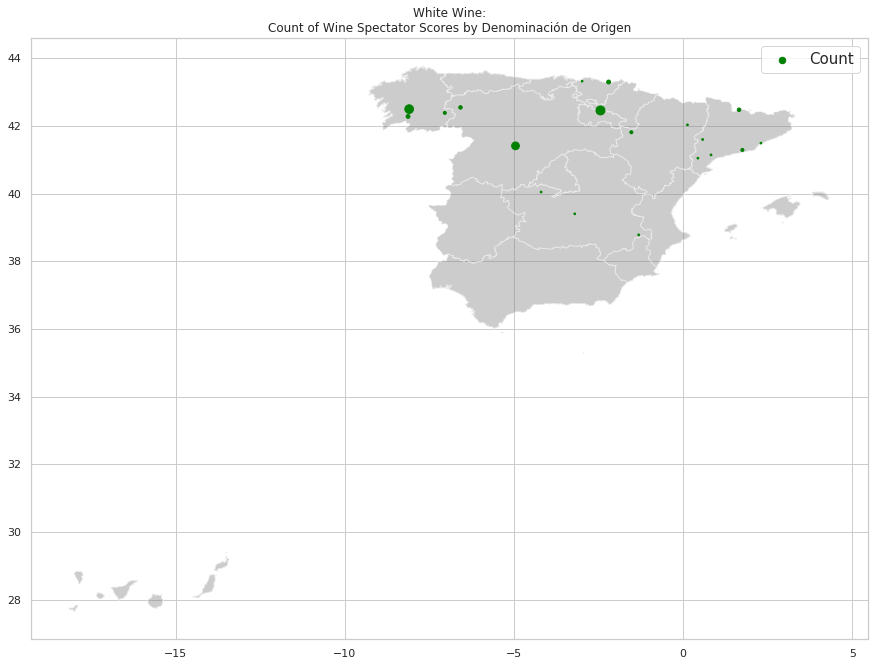

In [402]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'green', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('White Wine:\nCount of Wine Spectator Scores by Denominación de Origen')

### Tempranillo: Plot count of *Wine Spectator* Scores by Denominación de Origen

In [403]:
geo_count = [Point(xy) for xy in zip( df_geo_tempranillo_count_join['Longitude'], df_geo_tempranillo_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_tempranillo_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Rioja,105,42.461750,-2.445694,POINT (-2.44569 42.46175)
1,Ribera del Duero,81,41.683333,-3.683333,POINT (-3.68333 41.68333)
2,Toro,12,41.525556,-5.391111,POINT (-5.39111 41.52556)
3,Cigales,3,41.766667,-4.700000,POINT (-4.70000 41.76667)
4,La Mancha,2,39.405556,-3.205556,POINT (-3.20556 39.40556)


Text(0.5, 1, 'Tempranillo:\nCount of Wine Spectator Scores by Denominación de Origen')

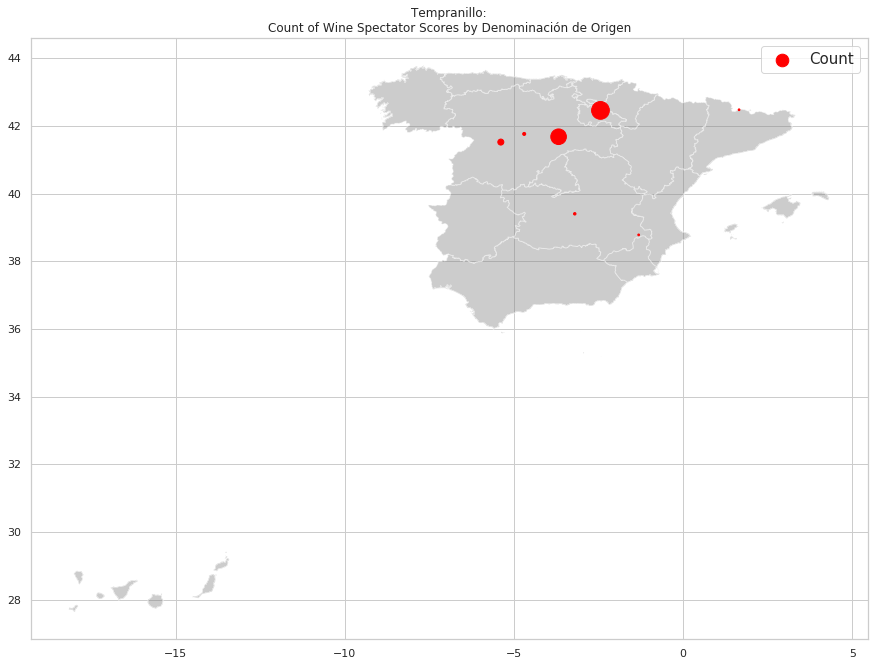

In [404]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'red', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Tempranillo:\nCount of Wine Spectator Scores by Denominación de Origen')

### Garnacha (Garnatxa,  Grenache): Plot count of *Wine Spectator* Scores by Denominación de Origen

In [405]:
geo_count = [Point(xy) for xy in zip( df_geo_garnacha_count_join['Longitude'], df_geo_garnacha_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_garnacha_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Campo de Borja,11,41.816667,-1.533333,POINT (-1.53333 41.81667)
1,Calatayud,7,41.650000,-0.883333,POINT (-0.88333 41.65000)
2,Rioja,7,42.461750,-2.445694,POINT (-2.44569 42.46175)
3,Montsant,5,41.146944,0.821389,POINT (0.82139 41.14694)
4,Navarra,4,42.481111,1.650556,POINT (1.65056 42.48111)


Text(0.5, 1, 'Garnacha (Garnatxa, Grenache):\nCount of Wine Spectator Scores by Denominación de Origen')

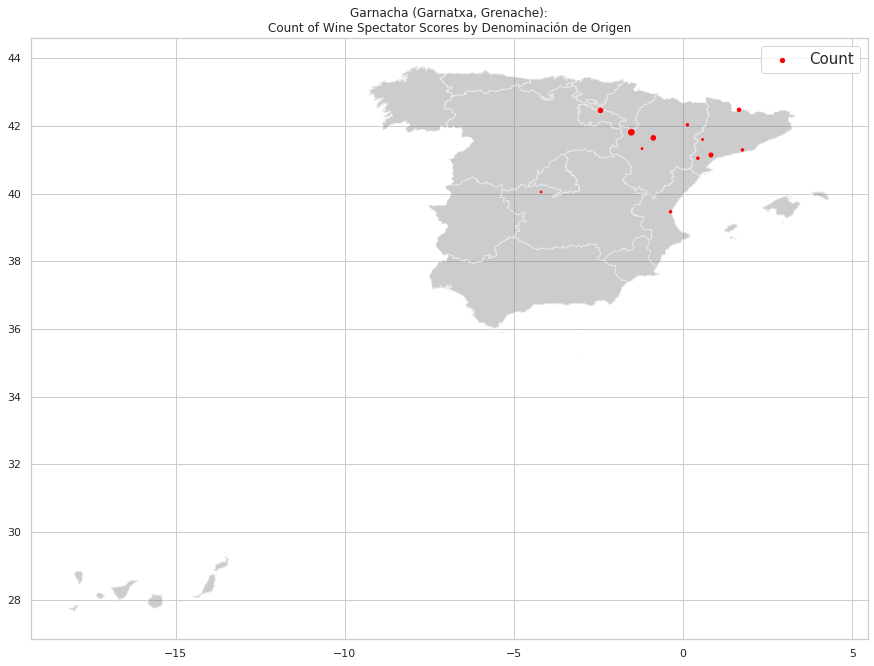

In [406]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'red', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Garnacha (Garnatxa, Grenache):\nCount of Wine Spectator Scores by Denominación de Origen')

### Albariño: Plot count of *Wine Spectator* Scores by Denominación de Origen

In [407]:
geo_count = [Point(xy) for xy in zip( df_geo_albarino_count_join['Longitude'], df_geo_albarino_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_albarino_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Rias Baixas,24,42.5,-8.1,POINT (-8.10000 42.50000)


Text(0.5, 1, 'Albariño:\nCount of Wine Spectator Scores by Denominación de Origen')

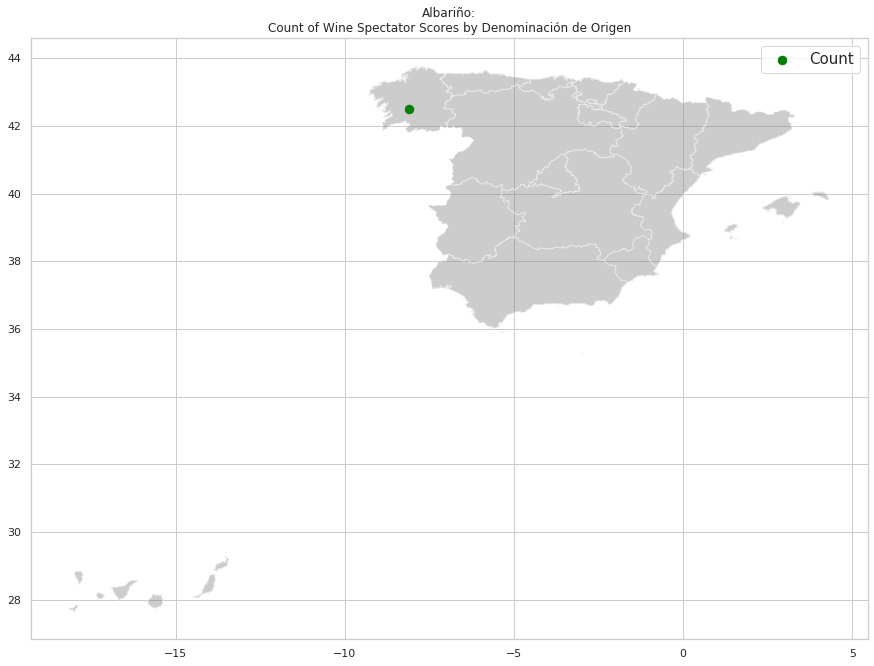

In [408]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'green', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Albariño:\nCount of Wine Spectator Scores by Denominación de Origen')

### Verdejo: Plot count of *Wine Spectator* Scores by Denominación de Origen

In [409]:
geo_count = [Point(xy) for xy in zip( df_geo_verdejo_count_join['Longitude'], df_geo_verdejo_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_verdejo_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Rueda,18,41.414130,-4.957104,POINT (-4.95710 41.41413)
1,La Mancha,1,39.405556,-3.205556,POINT (-3.20556 39.40556)


Text(0.5, 1, 'Verdejo:\nCount of Wine Spectator Scores by Denominación de Origen')

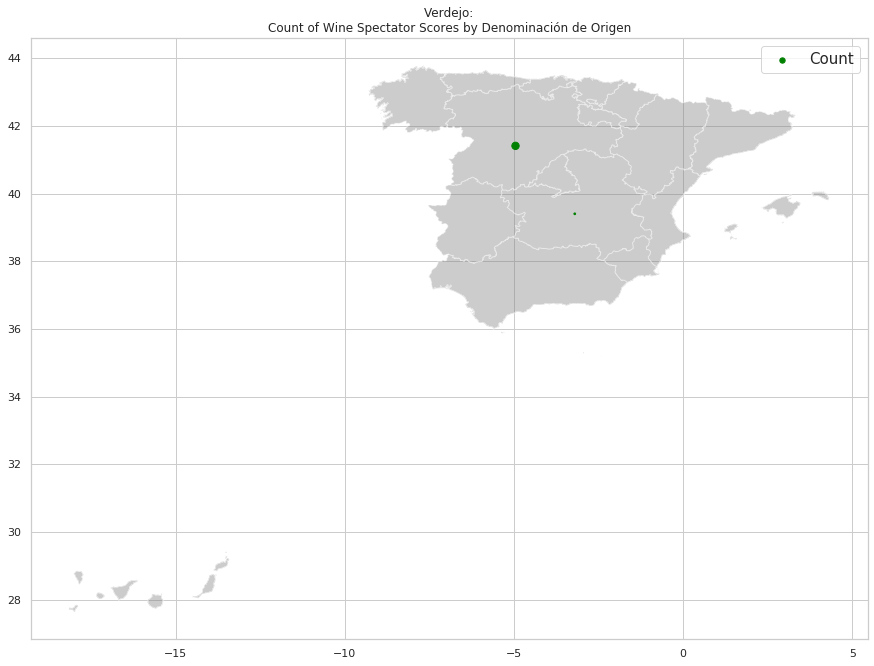

In [410]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'green', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Verdejo:\nCount of Wine Spectator Scores by Denominación de Origen')

### Monastrell (Mourvedre, Mataro): Plot count of *Wine Spectator* Scores by Denominación de Origen

In [411]:
geo_count = [Point(xy) for xy in zip( df_geo_monastrell_count_join['Longitude'], df_geo_monastrell_count_join['Latitude'])]

geo_df_count = gpd.GeoDataFrame(
    df_geo_monastrell_count_join, 
    crs = crs, 
    geometry = geo_count
)

geo_df_count.head()

,Denominación_de_Origen_DO,Score,Latitude,Longitude,geometry
0,Jumilla,13,38.783333,-1.316667,POINT (-1.31667 38.78333)
1,Alicante,2,38.736944,-0.274656,POINT (-0.27466 38.73694)
2,Yecla,1,38.616700,-1.116700,POINT (-1.11670 38.61670)


Text(0.5, 1, 'Monastrell (Mourvedre, Mataro):\nCount of Wine Spectator Scores by Denominación de Origen')

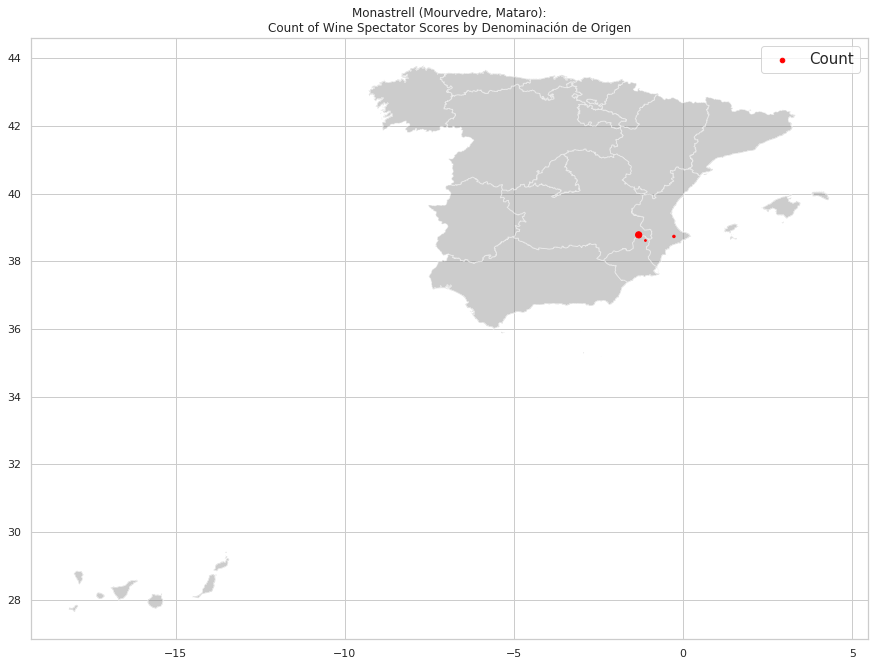

In [412]:
fig, ax = plt.subplots(figsize = (15, 15))

spain_map.plot(ax = ax, alpha = 0.4, color = 'gray')

geo_df_count.plot(ax=ax, markersize=geo_df_count['Score'] * 3, color = 'red', marker = 'o', label = 'Count')
plt.legend(prop={'size': 15})
plt.title('Monastrell (Mourvedre, Mataro):\nCount of Wine Spectator Scores by Denominación de Origen')